In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff 
from plotly.grid_objs import Grid, Column 
import colorlover as cl
import lifelines


path = 'https://s3.amazonaws.com/stockx-sneaker-analysis/wp-content/uploads/2019/02/StockX-Data-Contest-2019.xlsx'

df = pd.read_excel(path, sheet_name=1)


In [2]:
#gonna do some simple subtraction!
def profit_after_fees(x,y):
    '''
    Taking into account StockX's seller fees at 9.5% maximum and the additional 3% transaction fees.
    Should be 12.5% max 
    https://help.stockx.com/selling-on-stockx/what-are-stockx-selling-fees
    '''
    profit = x - y
    return round((profit * .875),2)

In [3]:
data = df.copy()

In [4]:
data['Profit After Fees'] = data.apply(lambda x: profit_after_fees(x['Sale Price'], x['Retail Price']), axis=1)

In [5]:
data['Favorite_by_State'] = data.groupby(['Buyer Region','Sneaker Name'])['Sneaker Name'].transform('count')
data['Favorite_by_Size'] = data.groupby(['Shoe Size','Sneaker Name'])['Sneaker Name'].transform('count')

In [6]:
state_favorite = data.groupby(['Buyer Region','Sneaker Name'], as_index=False)['Favorite_by_State'].max()
pivot_state_fav = state_favorite.pivot('Buyer Region', 'Sneaker Name', 'Favorite_by_State').fillna(0)

In [7]:
pivot_state_fav['Favorite_Sneaker'] = pivot_state_fav[['Adidas-Yeezy-Boost-350-Low-Moonrock',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Adidas-Yeezy-Boost-350-V2-Sesame', 'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Air-Jordan-1-Retro-High-Off-White-University-Blue',
       'Air-Jordan-1-Retro-High-Off-White-White',
       'Nike-Air-Force-1-Low-Off-White',
       'Nike-Air-Force-1-Low-Off-White-Black-White',
       'Nike-Air-Force-1-Low-Off-White-Volt',
       'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100',
       'Nike-Air-Max-90-Off-White', 'Nike-Air-Max-90-Off-White-Black',
       'Nike-Air-Max-90-Off-White-Desert-Ore', 'Nike-Air-Max-97-Off-White',
       'Nike-Air-Max-97-Off-White-Black',
       'Nike-Air-Max-97-Off-White-Elemental-Rose-Queen',
       'Nike-Air-Max-97-Off-White-Menta', 'Nike-Air-Presto-Off-White',
       'Nike-Air-Presto-Off-White-Black-2018',
       'Nike-Air-Presto-Off-White-White-2018', 'Nike-Air-VaporMax-Off-White',
       'Nike-Air-VaporMax-Off-White-2018', 'Nike-Air-VaporMax-Off-White-Black',
       'Nike-Blazer-Mid-Off-White',
       'Nike-Blazer-Mid-Off-White-All-Hallows-Eve',
       'Nike-Blazer-Mid-Off-White-Grim-Reaper',
       'Nike-Blazer-Mid-Off-White-Wolf-Grey',
       'Nike-React-Hyperdunk-2017-Flyknit-Off-White',
       'Nike-Zoom-Fly-Mercurial-Off-White-Black',
       'Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange',
       'Nike-Zoom-Fly-Off-White', 'Nike-Zoom-Fly-Off-White-Black-Silver',
       'Nike-Zoom-Fly-Off-White-Pink', 'adidas-Yeezy-Boost-350-V2-Butter',
       'adidas-Yeezy-Boost-350-V2-Static',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective']].max(axis=1)

In [8]:
pivot_state_fav['Favorite_Sneaker'].value_counts

<bound method IndexOpsMixin.value_counts of Buyer Region
Alabama                   71.0
Alaska                     9.0
Arizona                  164.0
Arkansas                  26.0
California              2146.0
Colorado                 131.0
Connecticut              145.0
Delaware                 236.0
District of Columbia      36.0
Florida                  695.0
Georgia                  210.0
Hawaii                    38.0
Idaho                     14.0
Illinois                 501.0
Indiana                  130.0
Iowa                      61.0
Kansas                    46.0
Kentucky                  55.0
Louisiana                 69.0
Maine                     30.0
Maryland                 205.0
Massachusetts            342.0
Michigan                 341.0
Minnesota                 80.0
Mississippi               25.0
Missouri                  84.0
Montana                    9.0
Nebraska                  37.0
Nevada                    73.0
New Hampshire             36.0
New Jersey   

In [9]:
l = []
for i in range(0,len(pivot_state_fav)):
    max_val = (pivot_state_fav == pivot_state_fav['Favorite_Sneaker'][i]).idxmax(axis=1)[i]
    l.append(max_val)

new_df = pd.DataFrame(l,columns={'Favorite_Sneaker'})
new_df['State'] = pivot_state_fav.index


In [10]:
size_favorite = data.groupby(['Shoe Size', 'Sneaker Name'], as_index=False)['Favorite_by_Size'].max()
pivot_size_fav = size_favorite.pivot('Shoe Size', 'Sneaker Name', 'Favorite_by_Size').fillna(0)


In [11]:
# pivot_size_fav.columns

pivot_size_fav['Favorite_Sneaker'] = pivot_size_fav[['Adidas-Yeezy-Boost-350-Low-Moonrock',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Adidas-Yeezy-Boost-350-V2-Sesame', 'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Air-Jordan-1-Retro-High-Off-White-University-Blue',
       'Air-Jordan-1-Retro-High-Off-White-White',
       'Nike-Air-Force-1-Low-Off-White',
       'Nike-Air-Force-1-Low-Off-White-Black-White',
       'Nike-Air-Force-1-Low-Off-White-Volt',
       'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100',
       'Nike-Air-Max-90-Off-White', 'Nike-Air-Max-90-Off-White-Black',
       'Nike-Air-Max-90-Off-White-Desert-Ore', 'Nike-Air-Max-97-Off-White',
       'Nike-Air-Max-97-Off-White-Black',
       'Nike-Air-Max-97-Off-White-Elemental-Rose-Queen',
       'Nike-Air-Max-97-Off-White-Menta', 'Nike-Air-Presto-Off-White',
       'Nike-Air-Presto-Off-White-Black-2018',
       'Nike-Air-Presto-Off-White-White-2018', 'Nike-Air-VaporMax-Off-White',
       'Nike-Air-VaporMax-Off-White-2018', 'Nike-Air-VaporMax-Off-White-Black',
       'Nike-Blazer-Mid-Off-White',
       'Nike-Blazer-Mid-Off-White-All-Hallows-Eve',
       'Nike-Blazer-Mid-Off-White-Grim-Reaper',
       'Nike-Blazer-Mid-Off-White-Wolf-Grey',
       'Nike-React-Hyperdunk-2017-Flyknit-Off-White',
       'Nike-Zoom-Fly-Mercurial-Off-White-Black',
       'Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange',
       'Nike-Zoom-Fly-Off-White', 'Nike-Zoom-Fly-Off-White-Black-Silver',
       'Nike-Zoom-Fly-Off-White-Pink', 'adidas-Yeezy-Boost-350-V2-Butter',
       'adidas-Yeezy-Boost-350-V2-Static',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective']].max(axis=1)

In [12]:
len(pivot_size_fav.columns) == len(pivot_state_fav.columns)

True

In [13]:
data['Sneaker Name'].nunique()

50

In [14]:
pivot_size_fav.index = pivot_size_fav.index.map(str)

In [15]:
m = []
for i in range(0,len(pivot_size_fav)):
    max_val = (pivot_size_fav == pivot_size_fav['Favorite_Sneaker'][i]).idxmax(axis=1)[i]
    m.append(max_val)

new_df2 = pd.DataFrame(m,columns={'Favorite_Sneaker'})
new_df2['Size'] = pivot_size_fav.index

# So for more analysis

- Created two data frames, favorite by state, favorite by size
- We still can do some more time series data?
- Honestly I want to do some predictions
- Like we can do logistic regression?
- We regonize what our continuous variables are..
- We have release dates.... so we can do some type of subtraction to measure how long it takes to resell a sneaker for profit
- THERE IS NEGATIVE PROFIT !


In [16]:
(data['Profit After Fees'] <= 0.0).value_counts()

False    99070
True       886
Name: Profit After Fees, dtype: int64

In [17]:
print(886/99070)

0.008943171494902594


In [18]:
# use np.busday_count(begindates, enddates, weekmask='1111111')
# we want everyday
order_dates = np.datetime_as_string(data['Order Date'].values, unit='D')
release_dates = np.datetime_as_string(data['Release Date'].values, unit='D')

turnover_days = []

for i in range(0,len(order_dates)):
    x = np.busday_count(release_dates[i], order_dates[i], weekmask='1111111')
    turnover_days.append(x)

len(turnover_days) == len(order_dates)

True

In [19]:
data['Days Until Resold'] = turnover_days
data.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Profit After Fees',
       'Favorite_by_State', 'Favorite_by_Size', 'Days Until Resold'],
      dtype='object')

In [20]:
# we could do reliability analysis...
# from release, to resale?
# we can predict the duration? or what
kmf = lifelines.KaplanMeierFitter()
cph = lifelines.CoxPHFitter()
naf = lifelines.NelsonAalenFitter()


In [21]:
brand = data['Brand']
brand_enc = pd.get_dummies(brand)
brand_enc.shape

(99956, 2)

In [22]:
shoe_size = data['Shoe Size']
size_enc = pd.get_dummies(shoe_size)

In [23]:
regions = data['Buyer Region']
regions_enc = pd.get_dummies(regions)
regions_enc.shape

(99956, 51)

In [24]:
sneakers = data['Sneaker Name']
sneakers_enc = pd.get_dummies(sneakers)
sneakers_enc.shape

(99956, 50)

In [25]:
dropped = data.drop(columns={'Sneaker Name','Order Date', 'Brand', 'Release Date', 'Buyer Region', 'Favorite_by_State','Favorite_by_Size'})
new_data = pd.concat([dropped,brand_enc,size_enc,regions_enc,sneakers_enc],axis=1)
new_data.shape

(99956, 134)

In [26]:
all_data = pd.concat([data,brand_enc,size_enc,regions_enc,sneakers_enc], axis=1)


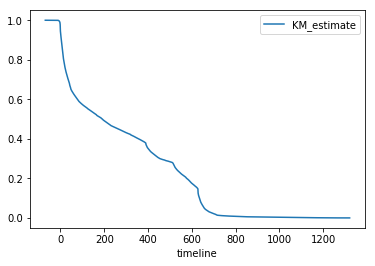

In [27]:
kmf.fit(new_data['Days Until Resold'], event_observed=new_data[' Yeezy'])
kmf.survival_function_.plot();

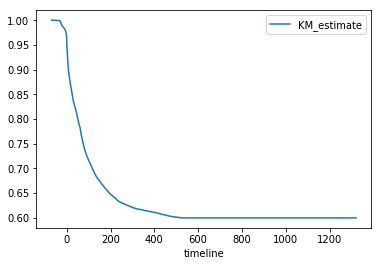

In [28]:
kmf.fit(new_data['Days Until Resold'], event_observed=new_data['Off-White'])
kmf.survival_function_.plot();

/Users/chrislouie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.



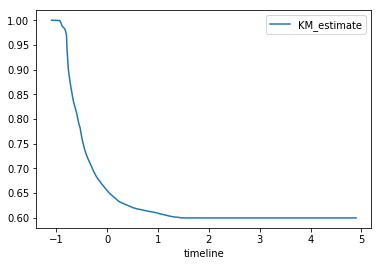

In [29]:
#looks extremely skewed...
#how about normalizing?
from sklearn.preprocessing import scale

scaled_data = scale(new_data)
scaled_data = pd.DataFrame(scaled_data,columns=new_data.columns)

kmf.fit(scaled_data['Days Until Resold'], event_observed=scaled_data['Off-White'])
kmf.survival_function_.plot();

In [62]:
states = data['Buyer Region'].unique()

In [63]:
all_data['Days Until Resold'].max()

1321

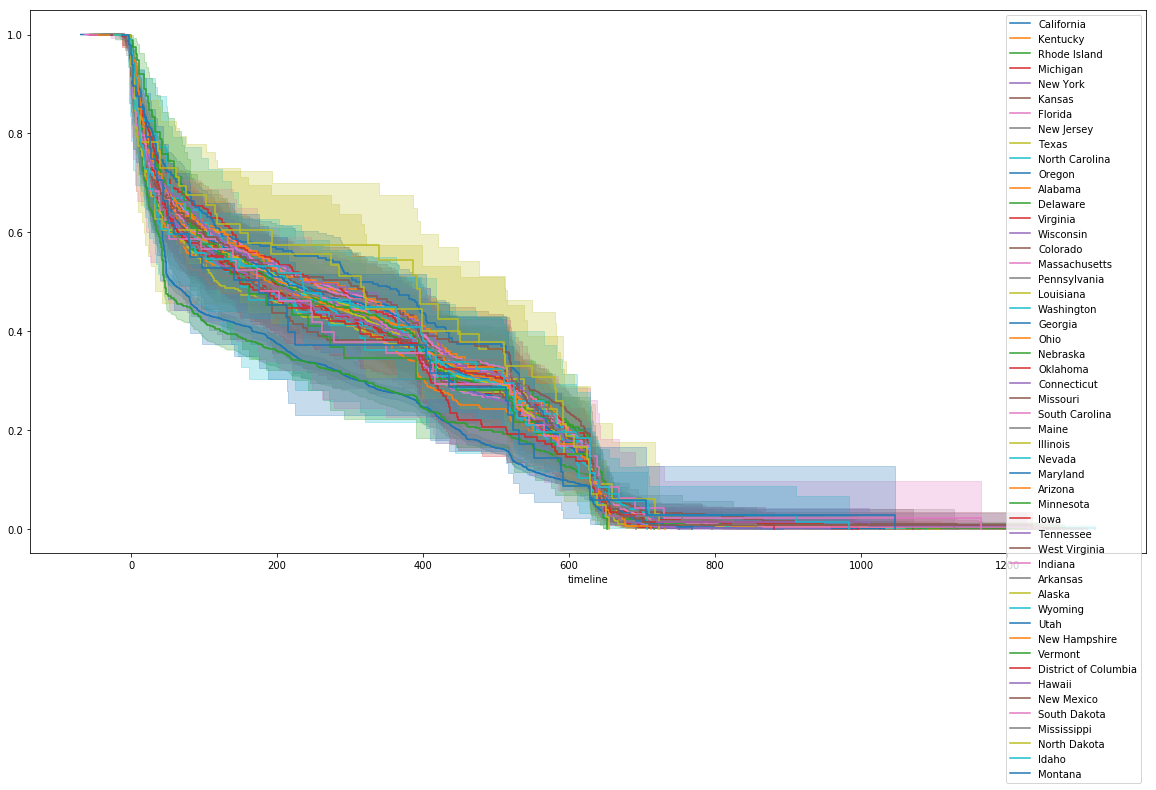

In [45]:
#scaled data did not help with survival analysis
fig = plt.figure(figsize=(20,10))

ax = fig.gca()

days_until_resold = all_data['Days Until Resold']
yeezy = all_data[' Yeezy']
off_white = all_data['Off-White']
# CA = all_data['Buyer Region'] == 'California'
# NY = all_data['Buyer Region'] == 'New York'

for i in states:
    x = all_data['Buyer Region'] == i
    kmf.fit(days_until_resold[x], event_observed=yeezy[x], label=i)
    kmf.plot(ax=ax);


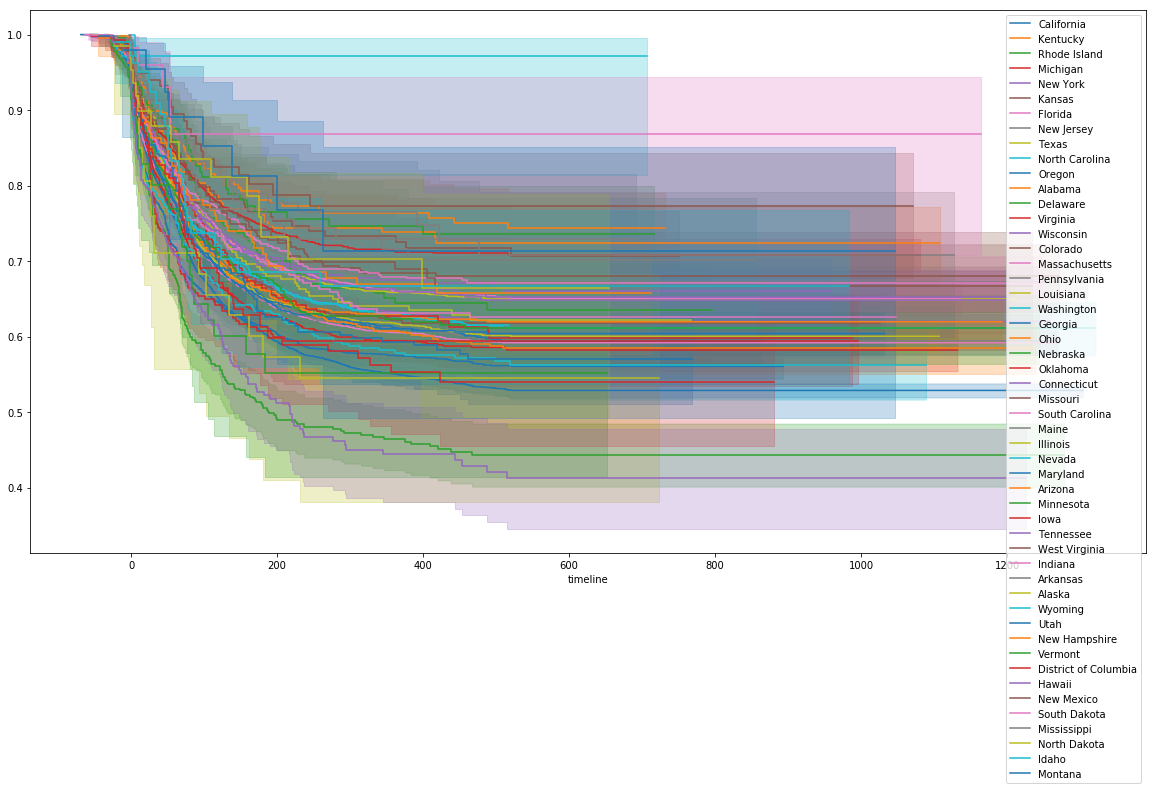

In [48]:
fig = plt.figure(figsize=(20,10))

ax = fig.gca()

days_until_resold = all_data['Days Until Resold']
yeezy = all_data[' Yeezy']
off_white = all_data['Off-White']

for i in states:
    x = all_data['Buyer Region'] == i
    kmf.fit(days_until_resold[x], event_observed=off_white[x], label=i)
    kmf.plot(ax=ax);

In [57]:
shoe_sizes = all_data['Shoe Size'].unique()

In [58]:
shoe_sizes

array([11. , 11.5,  8.5, 10. ,  9. , 14. ,  8. ,  5.5,  9.5, 10.5, 13. ,
       12. ,  5. ,  6.5,  6. ,  7.5, 12.5,  4. ,  7. , 13.5, 16. , 17. ,
       14.5,  4.5, 15. ,  3.5])

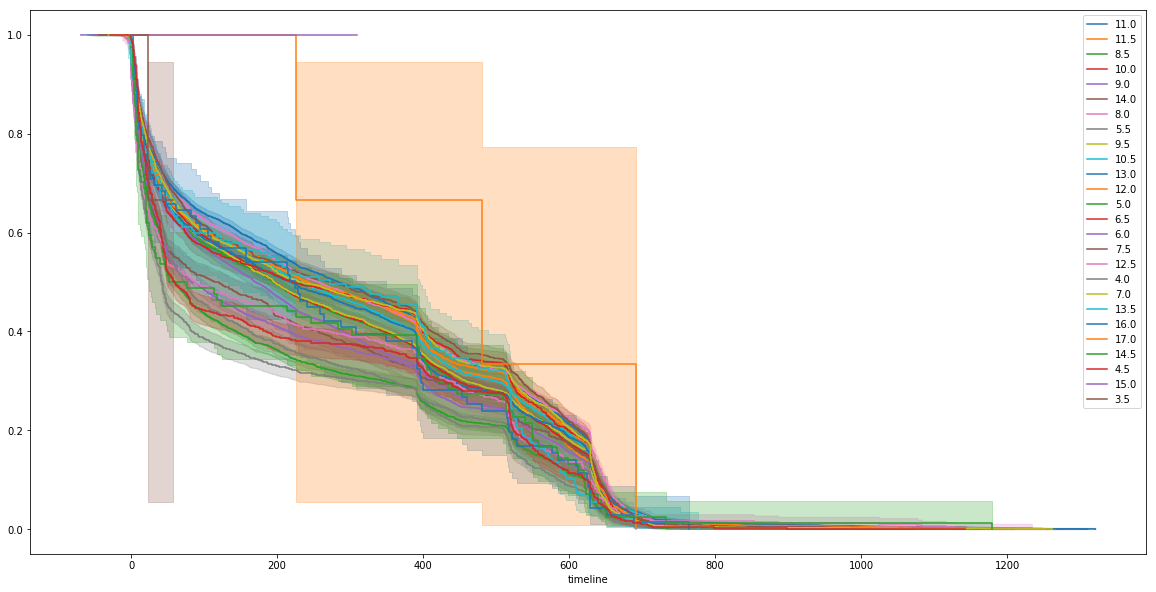

In [72]:
fig = plt.figure(figsize=(20,10))

ax = fig.gca()

days_until_resold = all_data['Days Until Resold']
yeezy = all_data[' Yeezy']
off_white = all_data['Off-White']

for i in shoe_sizes:
    x = all_data['Shoe Size'] == i
    kmf.fit(days_until_resold[x], event_observed=yeezy[x], label=i)
    kmf.plot(ax=ax);

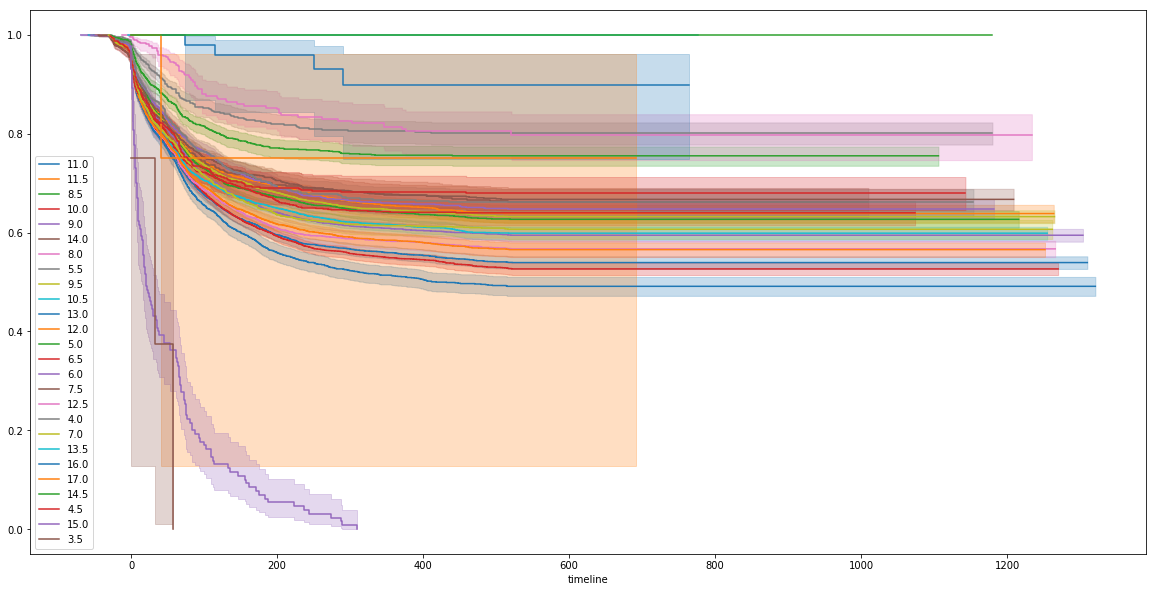

In [68]:
fig = plt.figure(figsize=(20,10))

ax = fig.gca()

days_until_resold = all_data['Days Until Resold']
yeezy = all_data[' Yeezy']
off_white = all_data['Off-White']

for i in shoe_sizes:
    x = all_data['Shoe Size'] == i
    kmf.fit(days_until_resold[x], event_observed=off_white[x], label=i)
    kmf.plot(ax=ax);

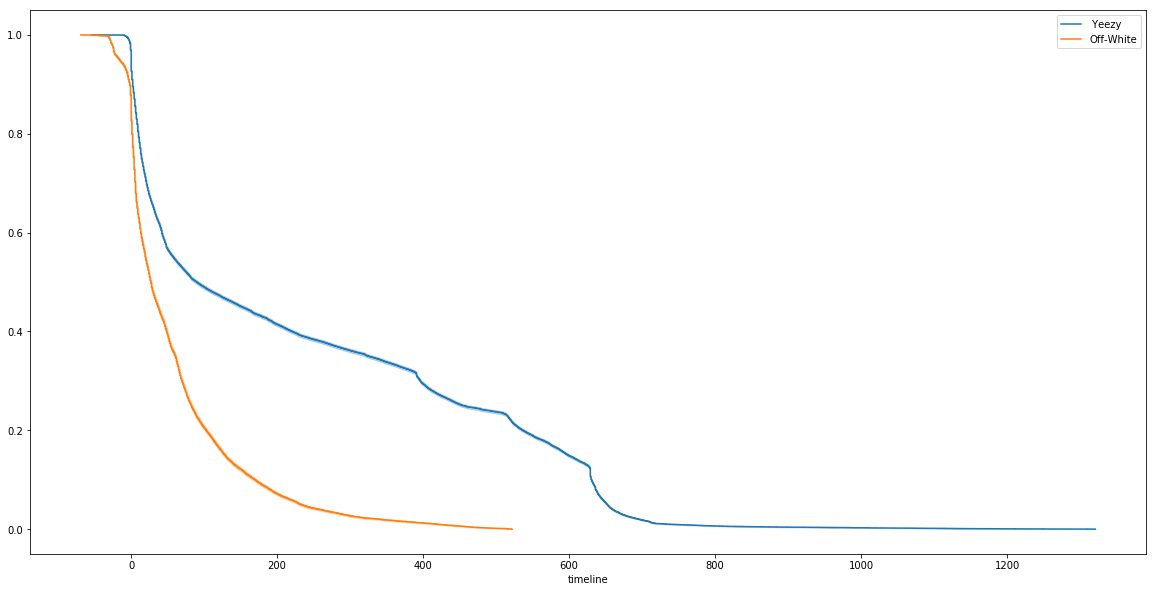

In [75]:
brand_l = all_data['Brand'].unique()

fig = plt.figure(figsize=(20,10))

ax = fig.gca()

days_until_resold = all_data['Days Until Resold']
profit = all_data['Profit After Fees']
yeezy = all_data[' Yeezy']
off_white = all_data['Off-White']


for i in brand_l:
    x = all_data['Brand'] == i
    kmf.fit(days_until_resold[x], event_observed=profit[x], label=i)
    kmf.plot(ax=ax);

In [80]:
scaled_data.head()

,Sale Price,Retail Price,Shoe Size,Profit After Fees,Days Until Resold,Yeezy,Off-White,3.5,4.0,4.5,...,Nike-Blazer-Mid-Off-White-Wolf-Grey,Nike-React-Hyperdunk-2017-Flyknit-Off-White,Nike-Zoom-Fly-Mercurial-Off-White-Black,Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,Nike-Zoom-Fly-Off-White,Nike-Zoom-Fly-Off-White-Black-Silver,Nike-Zoom-Fly-Off-White-Pink,adidas-Yeezy-Boost-350-V2-Butter,adidas-Yeezy-Boost-350-V2-Static,adidas-Yeezy-Boost-350-V2-Static-Reflective
0,2.540671,0.451844,0.710781,2.401008,0.681253,0.620614,-0.620614,-0.006326,-0.15144,-0.11497,...,-0.053755,-0.069755,-0.08059,-0.081279,-0.066113,-0.111251,-0.117403,-0.359201,-0.229058,-0.181389
1,0.931181,0.451844,0.710781,0.852903,0.423026,0.620614,-0.620614,-0.006326,-0.15144,-0.11497,...,-0.053755,-0.069755,-0.08059,-0.081279,-0.066113,-0.111251,-0.117403,-0.359201,-0.229058,-0.181389
2,0.950714,0.451844,0.710781,0.871669,0.423026,0.620614,-0.620614,-0.006326,-0.15144,-0.11497,...,-0.053755,-0.069755,-0.08059,-0.081279,-0.066113,-0.111251,-0.117403,-0.359201,-0.229058,-0.181389
3,2.454728,0.451844,0.925412,2.318299,0.423026,0.620614,-0.620614,-0.006326,-0.15144,-0.11497,...,-0.053755,-0.069755,-0.08059,-0.081279,-0.066113,-0.111251,-0.117403,-0.359201,-0.229058,-0.181389
4,1.489815,0.451844,0.710781,1.390209,0.078722,0.620614,-0.620614,-0.006326,-0.15144,-0.11497,...,-0.053755,-0.069755,-0.08059,-0.081279,-0.066113,-0.111251,-0.117403,-0.359201,-0.229058,-0.181389


# Logistic Regression?

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

features = scaled_data.drop(columns=['Days Until Resold'])
target = scaled_data['Days Until Resold'].values

X_train, X_test, y_train, y_test = train_test_split(features, target)

y_test = y_test.reshape(-1,1)

log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000).fit(X_train,y_train)

score = log_reg.score(X_test, y_test)

print(score)

ValueError: Unknown label type: 'continuous'

In [50]:
off_white = df.copy()
off_white = off_white[off_white['Brand'].isin(['Off-White'])]

yeezy = df.copy()
yeezy = yeezy[yeezy['Brand'].isin([' Yeezy'])]

print('Shape of Off-White dataframe : {}'.format(off_white.shape))
print('Shape of Yeezy dataframe : {}'.format(yeezy.shape))

Shape of Off-White dataframe : (27794, 8)
Shape of Yeezy dataframe : (72162, 8)


In [51]:
off_white['Profit After Fees'] = off_white.apply(lambda x: profit_after_fees(x['Sale Price'],x['Retail Price']), axis=1)
yeezy['Profit After Fees'] = yeezy.apply(lambda x: profit_after_fees(x['Sale Price'],x['Retail Price']), axis=1)


In [52]:
off_white['Favorite'] = off_white.groupby(['Buyer Region','Sneaker Name'])['Sneaker Name'].transform('count')
yeezy['Favorite'] = yeezy.groupby(['Buyer Region','Sneaker Name'])['Sneaker Name'].transform('count')